# 🧠 Kor-DEEPression
## 📊 Step 2-2. EDA 및 시각화 분석
> 🍷 작성자 : Codestates AIB 15기 정경재 (Kyung Jae, Cheong)
---

### 0. 💻 라이브러리 및 데이터 불러오기

- Library Import (라이브러리 불러오기)

In [1]:
# Library Import
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plex
import plotly.graph_objects as go
from plotly.subplots import make_subplots as plsp

# Matplotlib setting for VSCode
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# Renderer setting for VSCode & Github
import plotly.io as pio
pio.renderers.default = 'vscode+png'

- EDA Data Import (EDA 데이터 불러오기)

In [2]:
# csv파일을 DataFrame으로 불러오기(Depression)
df_depr = pd.read_csv('downloads/EDA_depr.csv')
print("Depression(정상vs우울증)")
df_depr.head()

Depression(정상vs우울증)


,id,year,age,BMI,sex,education,household,marital,economy,subj_health,...,modality,w_change,high_bp,diabetes,dyslipidemia,drk_freq,drk_amount,smoke,stress,depression
0,A209716213,2014,30,28.939858,Female,대졸 이상,2세대,미혼,실업자/비경제활동인구,보통,...,No,No,No,No,No,월 1회 미만,1-2잔,비흡연/과거흡연,적게 느끼는 편임,No
1,A209716216,2014,29,28.659708,Male,대졸 이상,2세대,미혼,실업자/비경제활동인구,보통,...,No,No,No,No,No,월 2-4회 정도,5-6잔,비흡연/과거흡연,거의 느끼지 않음,No
2,A209724716,2014,65,20.188238,Male,초졸 이하,1세대,기혼(유배우자),취업자,보통,...,No,No,Yes,Yes,No,평생 마셔본 적 없음,전혀 안마심,현재흡연,적게 느끼는 편임,No
3,A209731516,2014,66,24.145909,Male,대졸 이상,1세대,기혼(유배우자),실업자/비경제활동인구,좋음,...,No,No,No,No,No,1년간 마셔본 적 없음,전혀 안마심,비흡연/과거흡연,적게 느끼는 편임,No
4,A209736615,2014,41,30.598080,Female,고졸,2세대,기혼(유배우자),실업자/비경제활동인구,보통,...,Yes,No,No,No,No,주 4회 이상,10잔 이상,비흡연/과거흡연,대단히 많이 느낌,Yes


In [3]:
# csv파일을 DataFrame으로 불러오기(MDD)
df_mdd = pd.read_csv('downloads/EDA_mdd.csv')
print("MDD(경도우울vs주요우울)")
df_mdd.head()

MDD(경도우울vs주요우울)


,id,year,age,BMI,sex,education,household,marital,economy,subj_health,...,modality,w_change,high_bp,diabetes,dyslipidemia,drk_freq,drk_amount,smoke,stress,MDD
0,A209736615,2014,41,30.598080,Female,고졸,2세대,기혼(유배우자),실업자/비경제활동인구,보통,...,Yes,No,No,No,No,주 4회 이상,10잔 이상,비흡연/과거흡연,대단히 많이 느낌,No
1,A209745116,2014,40,27.439809,Male,고졸,1인 가구,미혼,취업자,보통,...,No,No,Yes,No,No,주 2-3회 정도,10잔 이상,비흡연/과거흡연,많이 느끼는 편임,No
2,A209799515,2014,64,27.029877,Female,고졸,2세대,기혼(유배우자),취업자,보통,...,No,No,Yes,No,No,월 2-4회 정도,1-2잔,비흡연/과거흡연,많이 느끼는 편임,No
3,A210729816,2014,64,18.286207,Female,초졸 이하,1인 가구,사별/이혼,실업자/비경제활동인구,매우 나쁨,...,Yes,No,Yes,No,Yes,1년간 마셔본 적 없음,전혀 안마심,비흡연/과거흡연,적게 느끼는 편임,Yes
4,A210741715,2014,73,21.068808,Female,초졸 이하,1세대,기혼(유배우자),취업자,나쁨,...,Yes,No,Yes,No,Yes,1년간 마셔본 적 없음,전혀 안마심,비흡연/과거흡연,많이 느끼는 편임,Yes


### 1. 🔎 데이터 확인

- Shape (모양 확인)

In [4]:
# Shape 확인
print(f"Data Shape (Depression) : {df_depr.shape}")
print(f"Data Shape (MDD) : {df_mdd.shape}")

Data Shape (Depression) : (16570, 21)
Data Shape (MDD) : (3359, 21)


- Check Null values & Duplicate values (결측값 및 중복값)

In [5]:
# 결측치 확인
print(f"Sum of Null Values (Depression) : {df_depr.isnull().sum().sum()}")
print(f"Sum of Null Values (MDD) : {df_mdd.isnull().sum().sum()}")
# 중복값 확인 (고유식별코드인 "id" column만 확인)
print(f"Sum of Duplicated Data (Depression) : {df_depr.id.duplicated().sum()}")
print(f"Sum of Duplicated Data (MDD) : {df_mdd.id.duplicated().sum()}")

Sum of Null Values (Depression) : 0
Sum of Null Values (MDD) : 0
Sum of Duplicated Data (Depression) : 0
Sum of Duplicated Data (MDD) : 0


- column's dtype (column 타입)

In [6]:
# Column 별 dtype을 확인 (Depression)
print("Dtypes (Depression)")
print(df_depr.dtypes)

Dtypes (Depression)
id               object
year              int64
age               int64
BMI             float64
sex              object
education        object
household        object
marital          object
economy          object
subj_health      object
limitation       object
modality         object
w_change         object
high_bp          object
diabetes         object
dyslipidemia     object
drk_freq         object
drk_amount       object
smoke            object
stress           object
depression       object
dtype: object


In [7]:
# Column 별 dtype을 확인 (MDD)
print("Dtypes (MDD)")
print(df_mdd.dtypes)

Dtypes (MDD)
id               object
year              int64
age               int64
BMI             float64
sex              object
education        object
household        object
marital          object
economy          object
subj_health      object
limitation       object
modality         object
w_change         object
high_bp          object
diabetes         object
dyslipidemia     object
drk_freq         object
drk_amount       object
smoke            object
stress           object
MDD              object
dtype: object


In [8]:
# dtype 일치여부 확인
list(df_depr.dtypes) == list(df_mdd.dtypes)

True

- Variable Classification (변수 분류)

In [9]:
# 식별코드 "id"를 제외한 변수들의 수치형 변수 및 범주형 변수 갯수 확인
# describe() 함수의 include 기능을 활용하여 갯수를 산출함(number에 int,float 모두 포함되므로 좀 더 간편하게 산출할 수 있음)
print('(Depression)')
print(f"Sum of Numerical Data : {df_depr.iloc[:,1:].describe(include=['number']).shape[1]}")
print(f"Sum of Categorical Data : {df_depr.iloc[:,1:].describe(include=['object']).shape[1]}")
print('(MDD)')
print(f"Sum of Numerical Data : {df_mdd.iloc[:,1:].describe(include=['number']).shape[1]}")
print(f"Sum of Categorical Data : {df_mdd.iloc[:,1:].describe(include=['object']).shape[1]}")

(Depression)
Sum of Numerical Data : 3
Sum of Categorical Data : 17
(MDD)
Sum of Numerical Data : 3
Sum of Categorical Data : 17


- Descriptive Statistics (기술 통계 요약)

In [10]:
# 수치형 변수 기술통계(descriptive statistics)
print('(Depression)')
display(df_depr.iloc[:,1:].describe(include=['number']).round(1).T)
print('(MDD)')
display(df_mdd.iloc[:,1:].describe(include=['number']).round(1).T)

(Depression)


,count,mean,std,min,25%,50%,75%,max
year,16570.0,2017.2,2.2,2014.0,2016.0,2018.0,2020.0,2020.0
age,16570.0,51.4,16.7,19.0,38.0,52.0,65.0,80.0
BMI,16570.0,24.0,3.6,14.1,21.5,23.7,26.0,62.6


(MDD)


,count,mean,std,min,25%,50%,75%,max
year,3359.0,2017.0,2.2,2014.0,2016.0,2016.0,2018.0,2020.0
age,3359.0,50.6,17.7,19.0,35.0,51.0,66.0,80.0
BMI,3359.0,23.9,3.8,14.1,21.3,23.4,26.2,50.9


In [11]:
# 범주형 변수 기술통계(descriptive statistics)
print('(Depression)')
display(df_depr.iloc[:,1:].describe(include=['object']).T)
print('(MDD)')
display(df_mdd.iloc[:,1:].describe(include=['object']).T)

(Depression)


,count,unique,top,freq
sex,16570,2,Female,9557
education,16570,4,대졸 이상,6049
household,16570,4,2세대,9146
marital,16570,3,기혼(유배우자),11644
economy,16570,2,취업자,9630
subj_health,16570,5,보통,8591
limitation,16570,2,No,15328
modality,16570,2,No,13358
w_change,16570,2,No,14969
high_bp,16570,2,No,11312


(MDD)


,count,unique,top,freq
sex,3359,2,Female,2305
education,3359,4,고졸,1116
household,3359,4,2세대,1779
marital,3359,3,기혼(유배우자),2017
economy,3359,2,실업자/비경제활동인구,1725
subj_health,3359,5,보통,1564
limitation,3359,2,No,2735
modality,3359,2,No,2171
w_change,3359,2,No,2897
high_bp,3359,2,No,2308


- 독립변수 및 종속변수

In [12]:
num_cols = list(df_depr.iloc[:,1:].describe(include=['number']).columns[1:])
cat_cols = list(df_depr.iloc[:,1:].describe(include=['object']).columns[:-1])
print("독립변수(Independent Variable)")
print(f"\t수치형 변수(Numerical Data) : 총 {len(num_cols)} 개")
print(f"\t범주형 변수(Categorical Data) : 총 {len(cat_cols)} 개")
print("종속변수(Dependent Variable)")
print(f"\tDepression(정상vs우울증) : '{df_depr.columns[-1]}'")
print(f"\tMDD(경도우울vs주요우울) : '{df_mdd.columns[-1]}'")

독립변수(Independent Variable)
	수치형 변수(Numerical Data) : 총 2 개
	범주형 변수(Categorical Data) : 총 16 개
종속변수(Dependent Variable)
	Depression(정상vs우울증) : 'depression'
	MDD(경도우울vs주요우울) : 'MDD'


#### 💡 데이터 확인 결과 요약
- Data Shape(데이터 형태)
  - Depression(정상vs우울증) : (16570, 21)
  - MDD(경도우울vs주요우울) : (3359, 21)
- 결측값 및 중복값  
  - 공통적으로 전처리를 거친 데이터들이기 때문에 결측데이터 및 중복데이터는 없음.
- 변수 분류(전체)  
  - 식별코드인 id를 제외하고 수치형 및 범주형 데이터 갯수는 다음과 같음.  
  - 수치형 변수(Numerical Data) : 총 3개 ['year', 'age', 'BMI']
  - 범주형 변수(Categorical Data) : 총 17개
- 변수 분류(독립변수 및 종속변수)  
  - column 중 'year' 변수는 EDA 및 대시보드에서만 활용하고, 모델링에서는 활용하지 않을 예정이기 때문에 독립변수 및 종속변수는 다음과 같음.  
  - 독립변수(Independent Variable)
    - 수치형 변수(Numerical Data) : 총 2개 ['age', 'BMI']
    - 범주형 변수(Categorical Data) : 총 16개 ['sex', $\cdots$ , 'stress']
  - 종속변수(Dependent Variable)
    - Depression(정상vs우울증) : 'depression'
    - MDD(경도우울vs주요우울) : 'MDD'
---

### 2. 🎯 종속변수(Targets) 분포(Distribution)

##### 2-1. Counts

- Depression(정상vs우울증) - Counts

In [13]:
# Group By Target counts
group_depr = df_depr.groupby(['depression'], as_index=False)['id'].count()
display(group_depr)
# 변수 값 수정
count_depr = group_depr.replace({'No': 'Normal (정상)', 'Yes': 'Depression (우울증)'})
display(count_depr)

,depression,id
0,No,13211
1,Yes,3359


,depression,id
0,Normal (정상),13211
1,Depression (우울증),3359


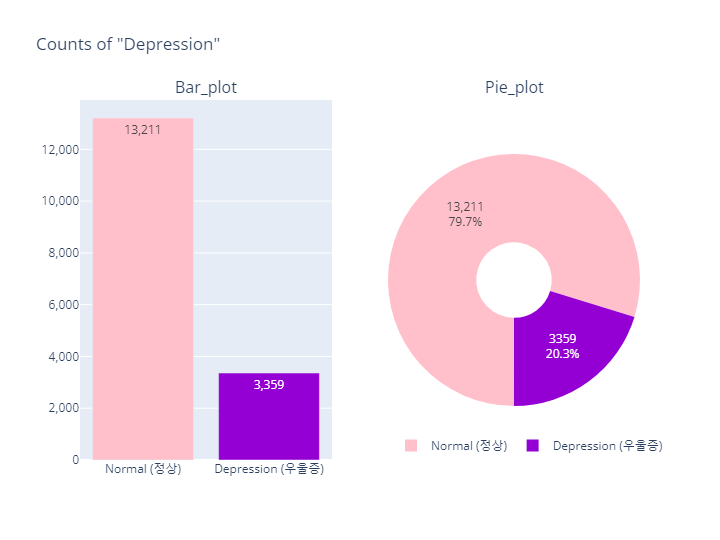

In [14]:
# Depression(정상vs우울증)-Count 시각화
plot_depr = plsp(rows=1, cols=2,
                 subplot_titles=('Bar_plot','Pie_plot'),
                 specs=[[{'type':'xy'}, {'type':'domain'}]])
plot_depr.add_trace(
    go.Bar(x=count_depr.depression,
           y=count_depr.id,
           marker_color=['pink', 'darkviolet'],
           texttemplate="%{y:,}",
           showlegend=False,
           hoverinfo='x+y'
           ),
    row=1, col=1
)
plot_depr.add_trace(
    go.Pie(values=count_depr.id,
           labels=count_depr.depression,
           hole=0.3,
           showlegend=True,
           marker_colors=['pink', 'darkviolet'],
           hoverinfo="label+value+percent",
           textinfo='value+percent',
           rotation=180
           ),
    row=1, col=2
)
plot_depr.update_layout(title_text='Counts of "Depression"',
                        width=720,
                        height=540,
                        legend=dict(orientation='h',
                                    yanchor='bottom', y=0,
                                    xanchor='right', x=1.05))
plot_depr.update_yaxes(tickformat=',')
plot_depr.show()

- MDD(경도우울vs주요우울장애) - Counts

In [15]:
# Group By Target counts
group_mdd = df_mdd.groupby(['MDD'], as_index=False)['id'].count()
display(group_mdd)
# 변수 값 수정
count_mdd = group_mdd.replace({'No': 'Minor D. (경도우울)', 'Yes': 'Major D. (주요우울)'})
display(count_mdd)

,MDD,id
0,No,2443
1,Yes,916


,MDD,id
0,Minor D. (경도우울),2443
1,Major D. (주요우울),916


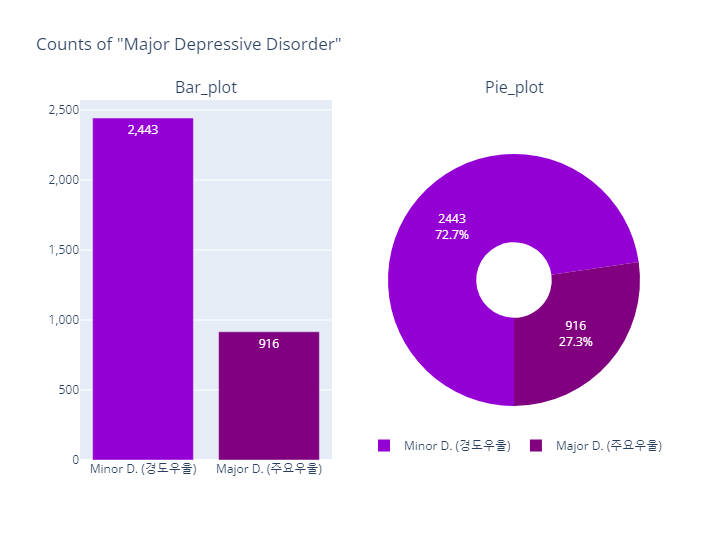

In [16]:
# MDD(경도우울vs주요우울장애) - Counts
plot_mdd = plsp(rows=1, cols=2,
                 subplot_titles=('Bar_plot','Pie_plot'),
                 specs=[[{'type':'xy'}, {'type':'domain'}]])
plot_mdd.add_trace(
    go.Bar(x=count_mdd.MDD,
           y=count_mdd.id,
           marker_color=['darkviolet', 'purple'],
           texttemplate="%{y:,}",
           showlegend=False,
           hoverinfo='x+y'
           ),
    row=1, col=1
)
plot_mdd.add_trace(
    go.Pie(values=count_mdd.id,
           labels=count_mdd.MDD,
           hole=0.3,
           showlegend=True,
           marker_colors=['darkviolet', 'purple'],
           hoverinfo="label+value+percent",
           textinfo='value+percent',
           rotation=180
           ),
    row=1, col=2
)
plot_mdd.update_layout(title_text='Counts of "Major Depressive Disorder"',
                        width=720,
                        height=540,
                        legend=dict(orientation='h',
                                    yanchor='bottom', y=0,
                                    xanchor='right', x=1.05))
plot_mdd.update_yaxes(tickformat=',')
plot_mdd.show()

##### 2-2. Year

- Depression(정상vs우울증) - Year

In [17]:
# Group By Target & Year
group_year_depr = df_depr.groupby(['depression', 'year'], as_index=False)['id'].count()
count_year_depr = group_year_depr.replace({'No': 'Normal (정상)', 'Yes': 'Depression (우울증)'})
display(count_year_depr)

,depression,year,id
0,Normal (정상),2014,2681
1,Normal (정상),2016,3297
2,Normal (정상),2018,3776
3,Normal (정상),2020,3457
4,Depression (우울증),2014,808
5,Depression (우울증),2016,894
6,Depression (우울증),2018,863
7,Depression (우울증),2020,794


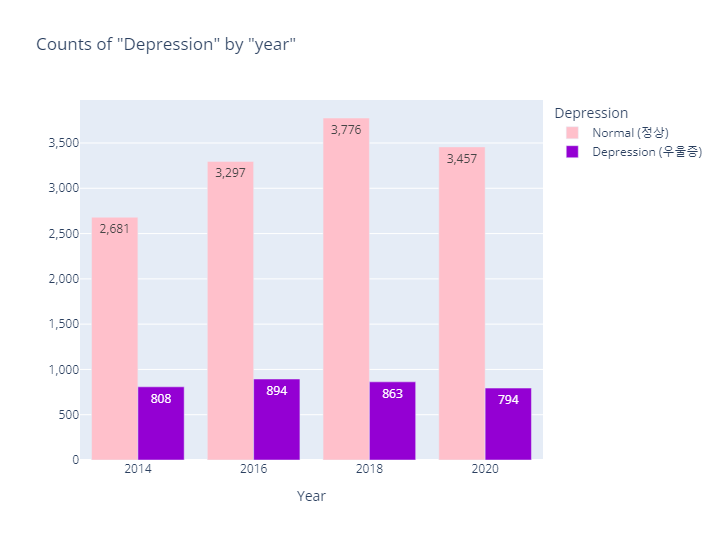

In [18]:
# Depression(정상vs우울증)-Year 시각화
bar_year_depr = plex.bar(data_frame=count_year_depr, barmode='group',
                         x='year', y='id', color='depression',
                         text_auto=True, color_discrete_sequence=['pink', 'darkviolet'],
                         title='Counts of "Depression" by "year"')
bar_year_depr.update_layout(width=720, height=540,
                            legend_title_text="Depression",
                            xaxis_title_text="Year",
                            yaxis_title_text="")
bar_year_depr.update_yaxes(tickformat=',')
bar_year_depr.show()

- MDD(경도우울vs주요우울장애) - Year

In [19]:
# Group By Target & Year
group_year_mdd = df_mdd.groupby(['MDD', 'year'], as_index=False)['id'].count()
count_year_mdd = group_year_mdd.replace({'No': 'Minor D. (경도우울)', 'Yes': 'Major D. (주요우울)'})
display(count_year_mdd)

,MDD,year,id
0,Minor D. (경도우울),2014,574
1,Minor D. (경도우울),2016,633
2,Minor D. (경도우울),2018,645
3,Minor D. (경도우울),2020,591
4,Major D. (주요우울),2014,234
5,Major D. (주요우울),2016,261
6,Major D. (주요우울),2018,218
7,Major D. (주요우울),2020,203


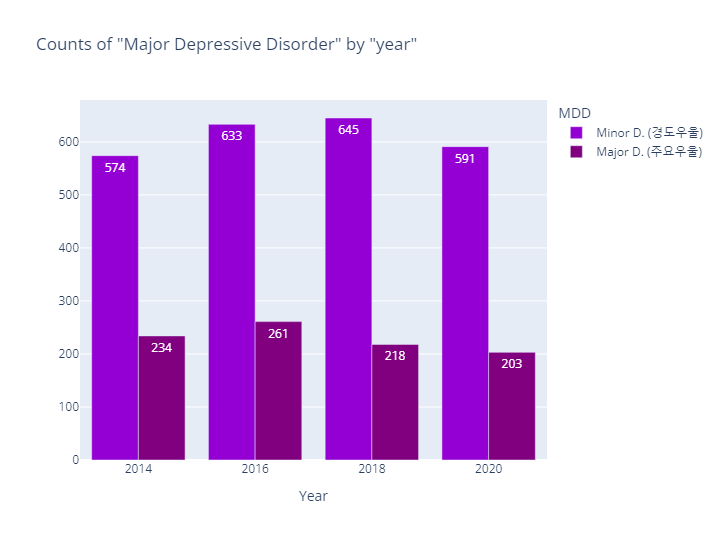

In [20]:
# MDD(경도우울vs주요우울장애)-Year 시각화
bar_year_mdd = plex.bar(data_frame=count_year_mdd, barmode='group',
                         x='year', y='id', color='MDD',
                         text_auto=True, color_discrete_sequence=['darkviolet', 'purple'],
                         title='Counts of "Major Depressive Disorder" by "year"')
bar_year_mdd.update_layout(width=720, height=540,
                            legend_title_text="MDD",
                            xaxis_title_text="Year",
                            yaxis_title_text="")
bar_year_mdd.update_yaxes(tickformat=',')
bar_year_mdd.show()

##### 💡 종속변수(Targets) 분포(Distribution) 정리
- Depression(정상vs우울증)
    - 우울증 유병률 : 20.3%
- MDD(경도우울vs주요우울장애)
    - 우울증 의심자 중 주요우울장애(MDD) 유병률 : 27.3%
- Depression, MDD target 모두 연도별로 비슷한 비율의 유병률을 나타냄.
---

### 3. 📈 독립변수(Features) 분포(Distribution) - 수치형(Numerical)

#### 3-1. Age (만나이)

- 기술통계(descriptive statistics)

In [21]:
# Age(만나이) 기술통계(descriptive statistics)
print('(Depression)')
display(df_depr.loc[:,'age'].describe().round(2))
print('(MDD)')
display(df_mdd.loc[:,'age'].describe().round(2))

(Depression)


count    16570.00
mean        51.40
std         16.74
min         19.00
25%         38.00
50%         52.00
75%         65.00
max         80.00
Name: age, dtype: float64

(MDD)


count    3359.00
mean       50.61
std        17.67
min        19.00
25%        35.00
50%        51.00
75%        66.00
max        80.00
Name: age, dtype: float64

- Histogram (Age)

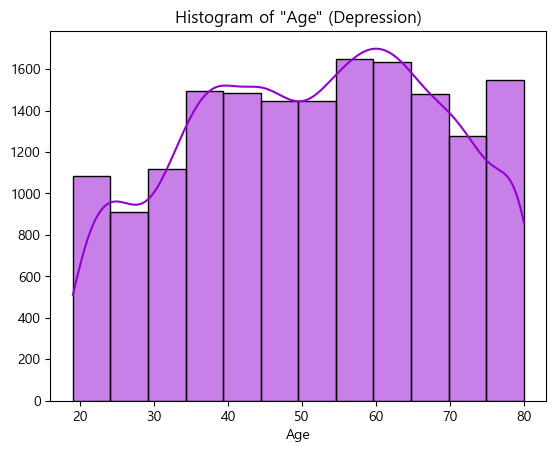

In [22]:
# Age(만나이) Histogram (Depression)
sns.histplot(data=df_depr, x='age', kde=True, bins=12, color='darkviolet')
plt.title('Histogram of "Age" (Depression)')
plt.xlabel('Age')
plt.ylabel('')
plt.show()

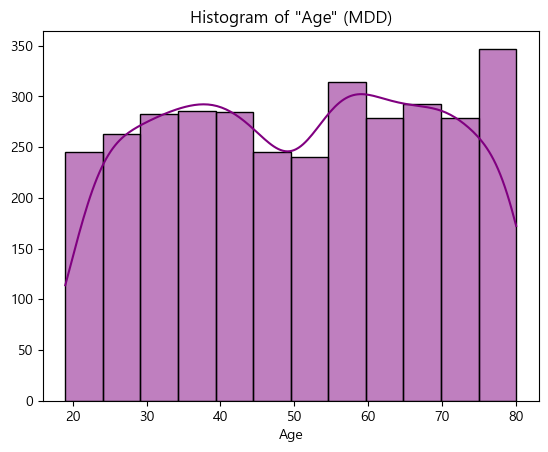

In [23]:
# Age(만나이) Histogram (MDD)
sns.histplot(data=df_mdd, x='age', kde=True, bins=12, color='purple')
plt.title('Histogram of "Age" (MDD)')
plt.xlabel('Age')
plt.ylabel('')
plt.show()

- Histogram (Age & Target)

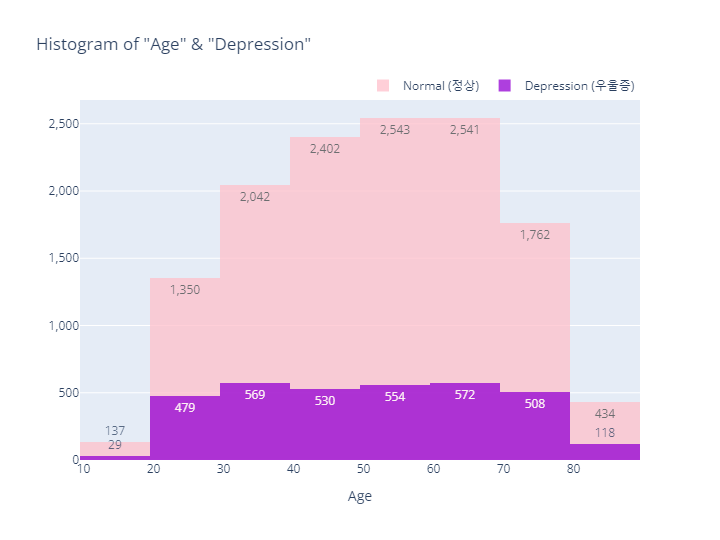

In [24]:
# Age(만나이) & Target Histogram (Depression)
query_age_depr_no = df_depr.query('depression == "No"')
query_age_depr_yes = df_depr.query('depression == "Yes"')

hist_age_depr = go.Figure()
hist_age_depr.add_trace(
    go.Histogram(x=query_age_depr_no.age,
                 nbinsx=12,
                 name='Normal (정상)',
                 marker_color='pink',
                 texttemplate="%{y}",
                 hoverinfo='x+y')
)
hist_age_depr.add_trace(
    go.Histogram(x=query_age_depr_yes.age,
                 nbinsx=12,
                 name='Depression (우울증)',
                 marker_color='darkviolet',
                 texttemplate="%{y}",
                 hoverinfo='x+y')
)
hist_age_depr.update_layout(barmode='overlay',
                            title_text='Histogram of "Age" & "Depression"',
                            xaxis_title_text="Age",
                            yaxis_title_text="",
                            width=720,
                            height=540,
                            legend=dict(orientation='h',
                                        yanchor='bottom', y=1,
                                        xanchor='right', x=1))
hist_age_depr.update_xaxes(dtick=10)
hist_age_depr.update_yaxes(tickformat=',')
hist_age_depr.update_traces(opacity=0.75)
hist_age_depr.show()

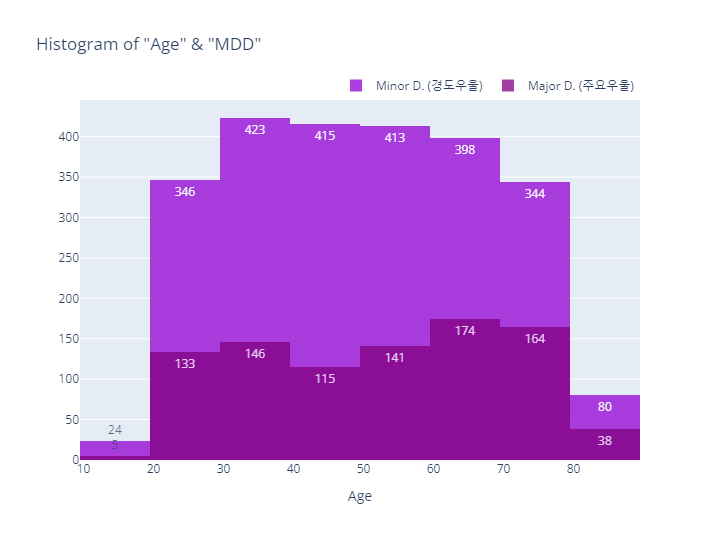

In [25]:
# Age(만나이) & Target Histogram (MDD)
query_age_mdd_no = df_mdd.query('MDD == "No"')
query_age_mdd_yes = df_mdd.query('MDD == "Yes"')

hist_age_mdd = go.Figure()
hist_age_mdd.add_trace(
    go.Histogram(x=query_age_mdd_no.age,
                 nbinsx=12,
                 name='Minor D. (경도우울)',
                 marker_color='darkviolet',
                 texttemplate="%{y}",
                 hoverinfo='x+y')
)
hist_age_mdd.add_trace(
    go.Histogram(x=query_age_mdd_yes.age,
                 nbinsx=12,
                 name='Major D. (주요우울)',
                 marker_color='purple',
                 texttemplate="%{y}",
                 hoverinfo='x+y')
)
hist_age_mdd.update_layout(barmode='overlay',
                            title_text='Histogram of "Age" & "MDD"',
                            xaxis_title_text="Age",
                            yaxis_title_text="",
                            width=720,
                            height=540,
                            legend=dict(orientation='h',
                                        yanchor='bottom', y=1,
                                        xanchor='right', x=1))
hist_age_mdd.update_xaxes(dtick=10)
hist_age_mdd.update_yaxes(tickformat=',')
hist_age_mdd.update_traces(opacity=0.75)
hist_age_mdd.show()

##### 💡 Age (만나이) 분포 정리
- Depression, MDD target 모두 나이대별로 분포가 치우쳐지지 않고 고르게 분포되어 있음
- 두 target 모두 나이에 따라서 우울증 및 주요우울장애의 유병률의 차이는 보이진 않았음

#### 3-2. BMI (체질량지수)

- 기술통계(descriptive statistics)

In [26]:
# BMI (체질량지수) 기술통계(descriptive statistics)
print('(Depression)')
display(df_depr.loc[:,'BMI'].describe().round(2))
print('(MDD)')
display(df_mdd.loc[:,'BMI'].describe().round(2))

(Depression)


count    16570.00
mean        23.98
std          3.55
min         14.14
25%         21.51
50%         23.67
75%         26.02
max         62.64
Name: BMI, dtype: float64

(MDD)


count    3359.00
mean       23.89
std         3.83
min        14.14
25%        21.26
50%        23.43
75%        26.19
max        50.90
Name: BMI, dtype: float64

- Histogram (BMI)

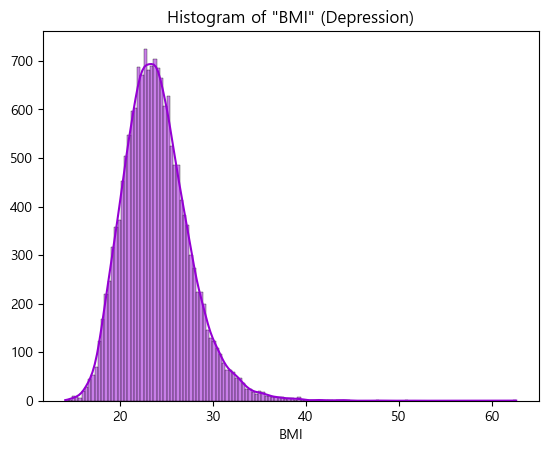

In [27]:
# BMI (체질량지수) Histogram (Depression)
sns.histplot(data=df_depr, x='BMI', kde=True, color='darkviolet')
plt.title('Histogram of "BMI" (Depression)')
plt.xlabel('BMI')
plt.ylabel('')
plt.show()

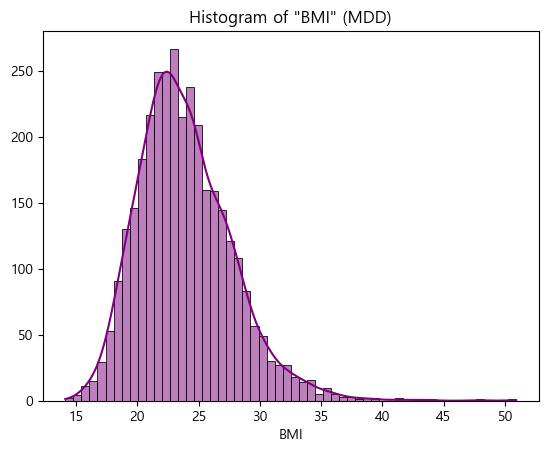

In [28]:
# BMI (체질량지수) Histogram (MDD)
sns.histplot(data=df_mdd, x='BMI', kde=True, color='purple')
plt.title('Histogram of "BMI" (MDD)')
plt.xlabel('BMI')
plt.ylabel('')
plt.show()

- Histogram (BMI & Target)

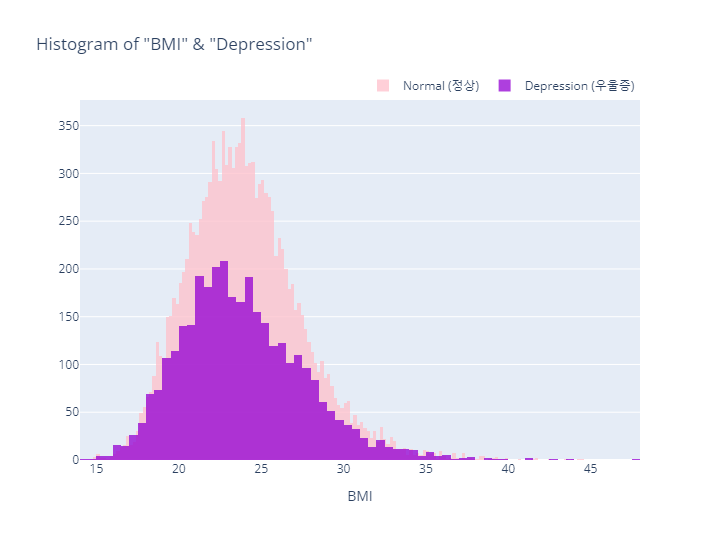

In [29]:
# BMI (체질량지수) & Target Histogram (Depression)
query_BMI_depr_no = df_depr.query('depression == "No"')
query_BMI_depr_yes = df_depr.query('depression == "Yes"')

hist_BMI_depr = go.Figure()
hist_BMI_depr.add_trace(
    go.Histogram(x=query_BMI_depr_no.BMI,
                 xbins=dict(end=50),
                 name='Normal (정상)',
                 marker_color='pink',
                 hoverinfo='x+y')
)
hist_BMI_depr.add_trace(
    go.Histogram(x=query_BMI_depr_yes.BMI,
                 xbins=dict(end=50),
                 name='Depression (우울증)',
                 marker_color='darkviolet',
                 hoverinfo='x+y')
)
hist_BMI_depr.update_layout(barmode='overlay',
                            title_text='Histogram of "BMI" & "Depression"',
                            xaxis_title_text="BMI",
                            yaxis_title_text="",
                            width=720,
                            height=540,
                            legend=dict(orientation='h',
                                        yanchor='bottom', y=1,
                                        xanchor='right', x=1))
hist_BMI_depr.update_xaxes(dtick=5)
hist_BMI_depr.update_yaxes(tickformat=',')
hist_BMI_depr.update_traces(opacity=0.75)
hist_BMI_depr.show()

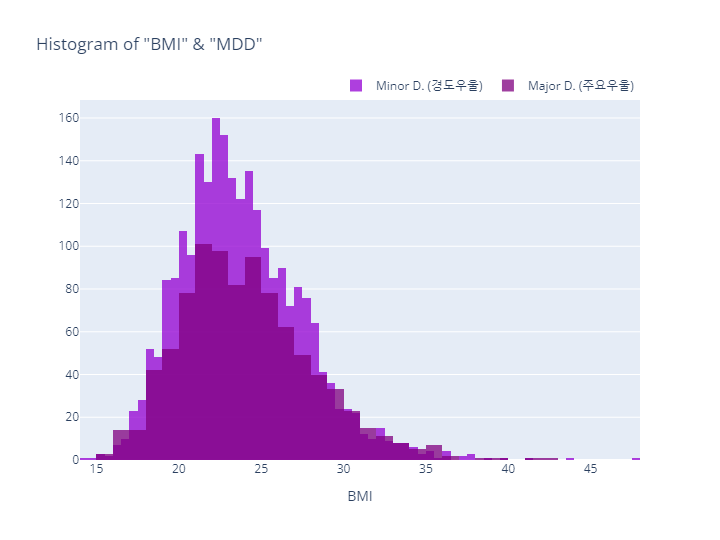

In [30]:
# BMI (체질량지수) & Target Histogram (MDD)
query_BMI_mdd_no = df_mdd.query('MDD == "No"')
query_BMI_mdd_yes = df_mdd.query('MDD == "Yes"')

hist_BMI_mdd = go.Figure()
hist_BMI_mdd.add_trace(
    go.Histogram(x=query_BMI_mdd_no.BMI,
                 xbins=dict(end=50),
                 name='Minor D. (경도우울)',
                 marker_color='darkviolet',
                 hoverinfo='x+y')
)
hist_BMI_mdd.add_trace(
    go.Histogram(x=query_BMI_mdd_yes.BMI,
                 xbins=dict(end=50),
                 name='Major D. (주요우울)',
                 marker_color='purple',
                 hoverinfo='x+y')
)
hist_BMI_mdd.update_layout(barmode='overlay',
                            title_text='Histogram of "BMI" & "MDD"',
                            xaxis_title_text="BMI",
                            yaxis_title_text="",
                            width=720,
                            height=540,
                            legend=dict(orientation='h',
                                        yanchor='bottom', y=1,
                                        xanchor='right', x=1))
hist_BMI_mdd.update_xaxes(dtick=5)
hist_BMI_mdd.update_yaxes(tickformat=',')
hist_BMI_mdd.update_traces(opacity=0.75)
hist_BMI_mdd.show()

##### 💡 BMI (체질량지수) 분포 정리
- Depression, MDD target 모두 BMI의 분포가 정규분포에 가까운 분포를 보임
    - 다만 이상치들이 존재하는 right-skewed 분포를 보이며, 이에따라 모델링에서는 최대치를 50으로 제한하여 모델링을 진행할 예정임 
- 두 target 모두 BMI에 따른 우울증 및 주요우울장애의 유병률의 차이는 보이진 않았음

#### 3-3. Age & BMI

In [31]:
# Age와 BMI의 상관관계
# 위에서 정의한 num_cols 변수를 이용함( ['age','BMI'] )
print("Depression")
display(df_depr[num_cols].corr())
print("MDD")
display(df_mdd[num_cols].corr())

Depression


,age,BMI
age,1.000000,0.081792
BMI,0.081792,1.000000


MDD


,age,BMI
age,1.000000,0.062234
BMI,0.062234,1.000000


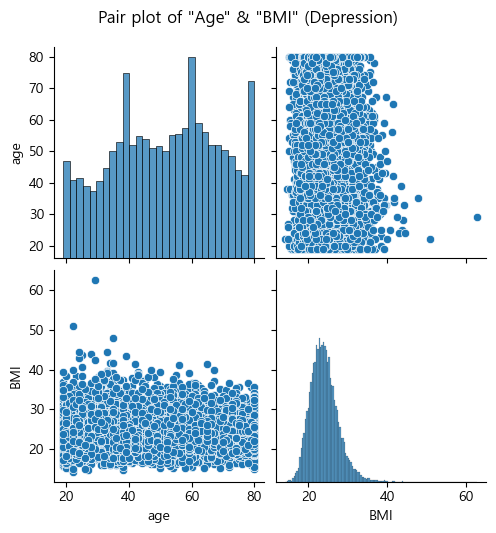

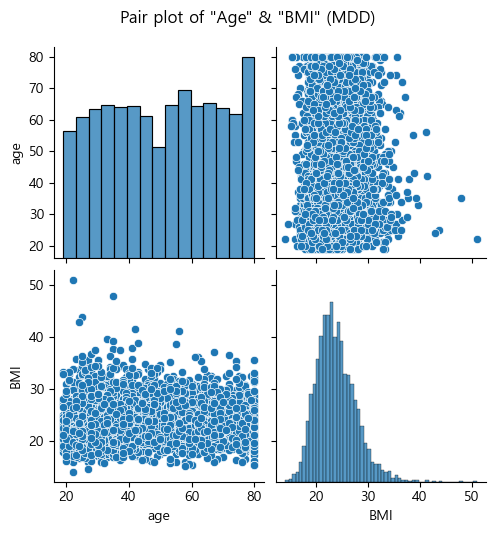

In [32]:
# Age와 BMI의 상관관계를 시각화
sns.pairplot(df_depr[num_cols])
plt.suptitle('Pair plot of "Age" & "BMI" (Depression)', y=1.05)
plt.show()
sns.pairplot(df_mdd[num_cols])
plt.suptitle('Pair plot of "Age" & "BMI" (MDD)', y=1.05)
plt.show()

##### 💡 Age & BMI 분포 정리
- 공통적으로 age와 BMI 간의 상관관계는 존재하지 않는 것으로 나타남
---

### 4. 📊 독립변수(Features) 분포(Distribution) - 범주형(Categorical)
- 독립변수 중 범주형 변수가 총 16개나 되므로 대시보드에 이용할 변수들만 추려서 살펴보도록 하겠음
    - sex (성별)
    - household (세대 유형)
    - marital (혼인상태)
    - subj_health (주관적 건강 인지도)
    - stress (스트레스 인지도)
- 각 변수 별로 Depression과 MDD 유병률 차이를 살펴볼 것이고, 변수간 조합을 통한 상관관계 분석은 생략

In [33]:
# 범주형 변수 bar_plot 함수 정의
def bar_category(target, col, order_list=None):
    if target == 'depression':
        # Group By Target & column
        group_df = df_depr.groupby([target, col], as_index=False)['id'].count()
        count_df = group_df.copy()
        count_df[target] = count_df[target].replace({'No': 'Normal (정상)', 'Yes': 'Depression (우울증)'})
        # 시각화 (depression)
        bar_plot = plex.bar(data_frame=count_df, barmode='group',
                            x=col, y='id', color=target,
                            text_auto=True, color_discrete_sequence=['pink', 'darkviolet'],
                            title=f'Bar plot of "Depression" by "{col.capitalize()}"')
    elif target == 'MDD':
        # Group By Target & column
        group_df = df_mdd.groupby([target, col], as_index=False)['id'].count()
        count_df = group_df.copy()
        count_df[target] = count_df[target].replace({'No': 'Minor D. (경도우울)', 'Yes': 'Major D. (주요우울)'})
        # 시각화 (MDD)
        bar_plot = plex.bar(data_frame=count_df, barmode='group',
                            x=col, y='id', color=target,
                            text_auto=True, color_discrete_sequence=['darkviolet', 'purple'],
                            title=f'Bar plot of "MDD" by "{col.capitalize()}"')
    else:
        raise Exception('Error : target must be "depression" or "MDD"')
    # 시각화 설정(공통)
    bar_plot.update_layout(width=720, height=540,
                           legend_title_text="",
                           xaxis_title_text=f"{col.capitalize()}",
                           yaxis_title_text="",
                           legend=dict(orientation="h",
                                       yanchor='bottom', y=1,
                                       xanchor='right', x=1))
    if order_list:
        bar_plot.update_layout(xaxis={'categoryorder':'array', 'categoryarray':order_list})
    bar_plot.update_yaxes(tickformat=',')
    bar_plot.show()    

In [34]:
# 범주형 변수 pie_plot 함수 정의
def pie_category(target, col):
    if target == 'depression':
        # Group By Target & column
        group_df = df_depr.groupby([target, col]).count()[['id']].rename(columns={'id':'Count'})
        group_df['Total'] = 'Total'
        count_df = group_df.reset_index()
        count_df[target] = count_df[target].replace({'No': 'Normal<br>(정상)', 'Yes': 'Depression<br>(우울증)'})
        # 시각화 (depression)
        pie_plot = plex.sunburst(data_frame=count_df,
                                 path=['Total',target, col],
                                 values='Count',
                                 color_discrete_sequence=['pink', 'darkviolet'],
                                 title=f'Pie plot of "Depression" by "{col.capitalize()}"')
    elif target == 'MDD':
        # Group By Target & column
        group_df = df_mdd.groupby([target, col]).count()[['id']].rename(columns={'id':'Count'})
        group_df['Total'] = 'Total'
        count_df = group_df.reset_index()
        count_df[target] = count_df[target].replace({'No': 'Minor D.<br>(경도우울)', 'Yes': 'Major D.<br>(주요우울)'})
        # 시각화 (MDD)
        pie_plot = plex.sunburst(data_frame=count_df,
                                 path=['Total',target, col],
                                 values='Count',
                                 color_discrete_sequence=['darkviolet', 'purple'],
                                 title=f'Pie plot of "MDD" by "{col.capitalize()}"')
    else:
        raise Exception('Error : target must be "depression" or "MDD"')
    # 시각화 설정(공통)
    pie_plot.update_traces(textinfo='label+percent parent')
    pie_plot.update_layout(width=540, height=540)
    pie_plot.show()

#### 4-1. Sex (성별)

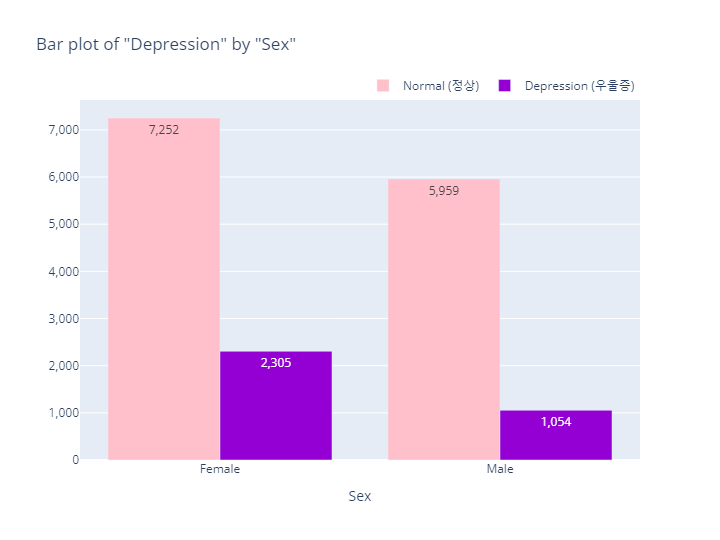

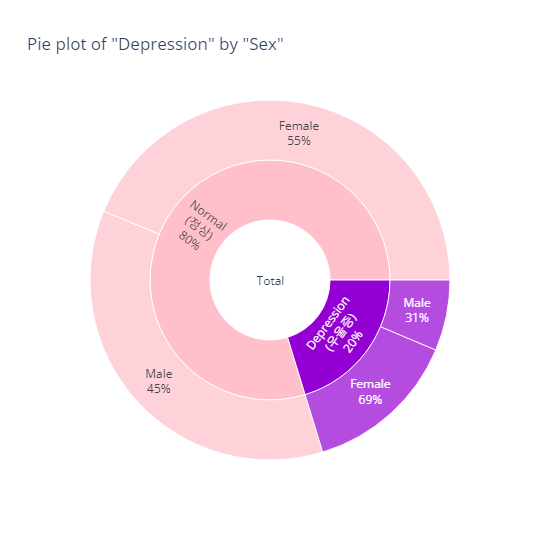

In [35]:
bar_category(target='depression', col='sex')
pie_category(target='depression', col='sex')

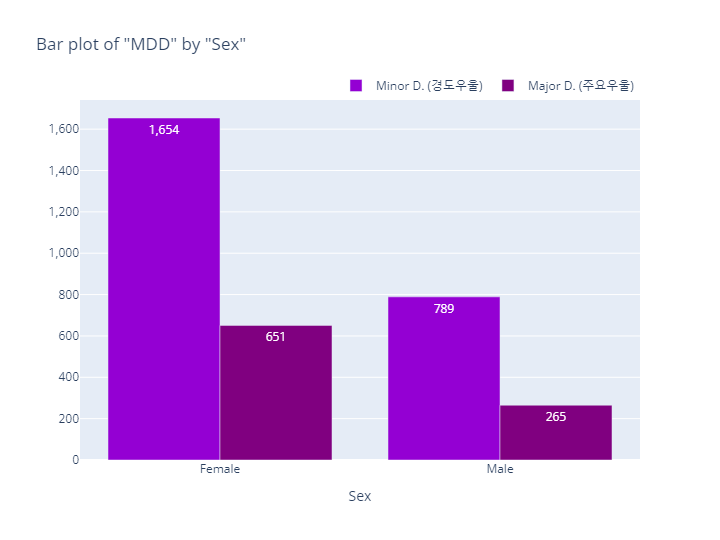

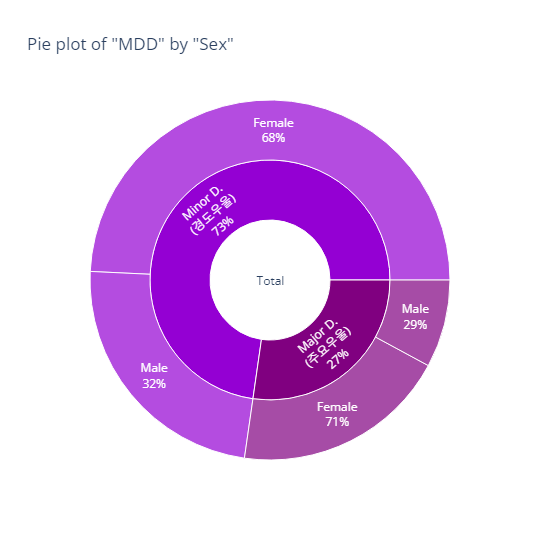

In [36]:
bar_category(target='MDD', col='sex')
pie_category(target='MDD', col='sex')

💡Sex(성별)
- Normal(정상) 그룹에서는 남녀간의 차이가 거의 없었음
- Depression(우울증) 그룹에서는 남성에 비해 여성의 비율이 훨씬 높게 나타났음
- 경도우울증(Minor D.)과 주요우울장애(Major D.) 모두 남성에 비해 여성의 비율이 훨씬 높게 나타났음

#### 4-2. Household(세대 유형)

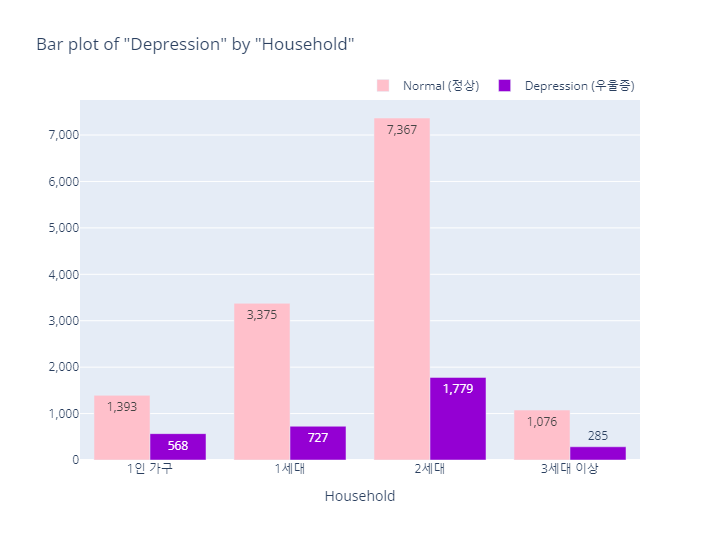

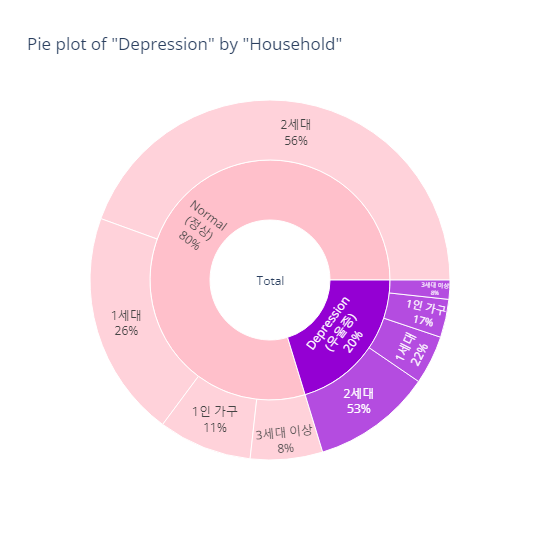

In [40]:
household_order = ['1인 가구', '1세대', '2세대', '3세대 이상']
bar_category(target='depression', col='household', order_list=household_order)
pie_category(target='depression', col='household')

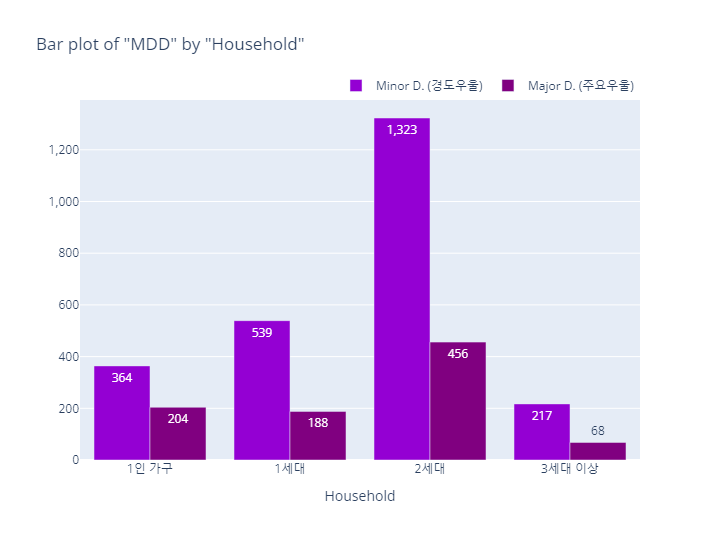

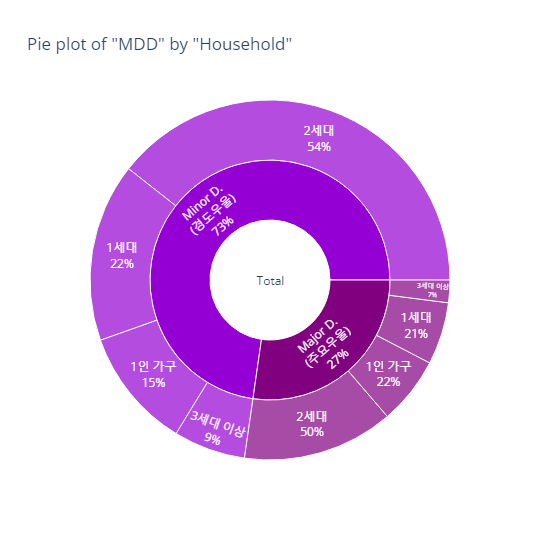

In [41]:
bar_category(target='MDD', col='household', order_list=household_order)
pie_category(target='MDD', col='household')

💡Household(세대 유형)
- 세대 유형이 1인 가구인 경우 우울증 및 주요우울장애 비율이 더 높게 나타남
- 나머지 변수들에서는 정상 및 경도우울증의 비율이 더 높게 나타남
- 따라서 1인 가구가 우울증에 대한 상대적으로 좀 더 높은 위험도를 지닌다 볼 수 있음

#### 4-3. Marital status (혼인상태)

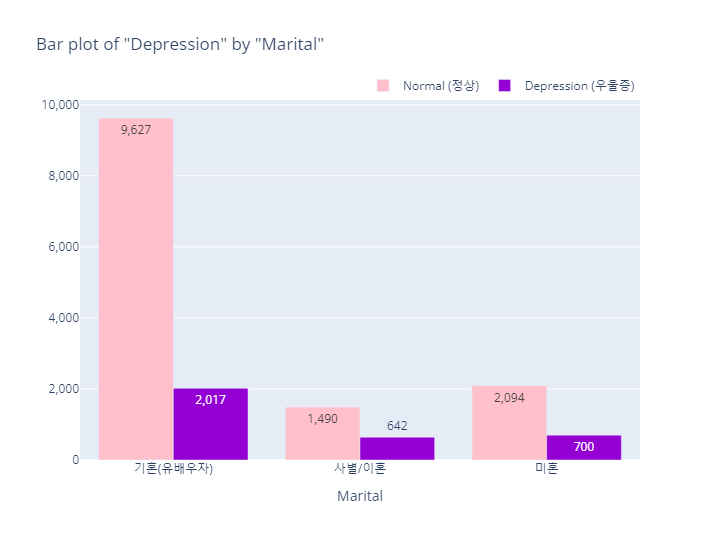

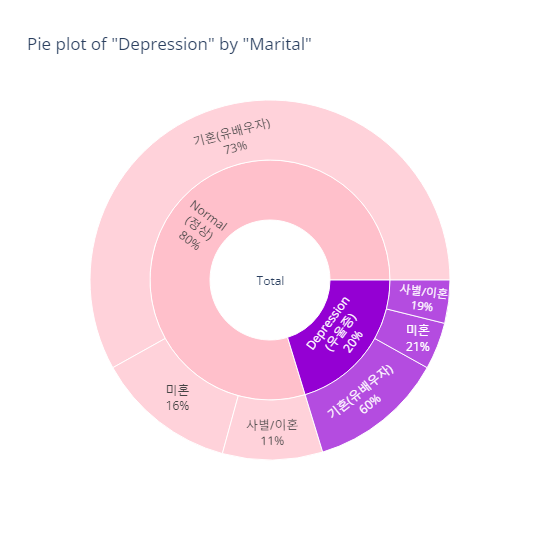

In [43]:
marital_order = ['기혼(유배우자)', '사별/이혼', '미혼']
bar_category(target='depression', col='marital', order_list=marital_order)
pie_category(target='depression', col='marital')

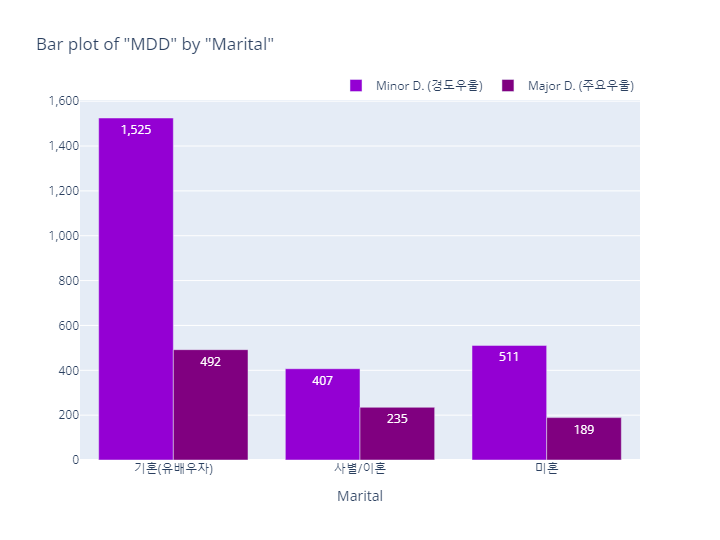

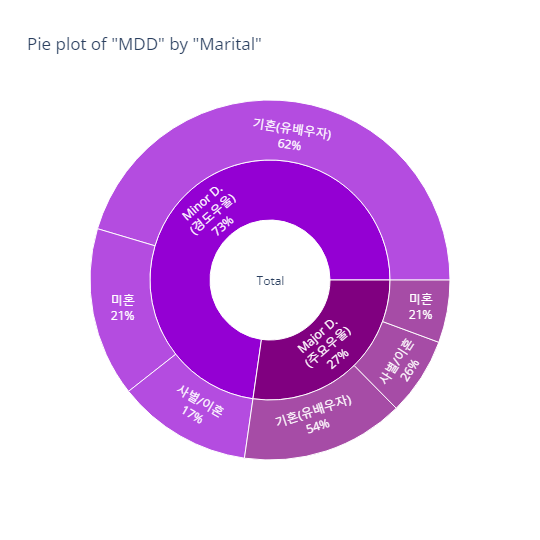

In [44]:
bar_category(target='MDD', col='marital', order_list=marital_order)
pie_category(target='MDD', col='marital')

💡Marital status (혼인상태)
- 혼인상태의 경우 배우자가 있는 경우(기혼), 정상 및 경도우울증의 비율이 더 높게 나타남
- 사별 혹은 이혼인 경우엔, 우울증 및 주요우울장애의 비율이 더 높게 나타남
- 미혼인 경우, 정상군에 비해 우울증 비율이 더 높게 나타났지만, 경도우울증과 주요우울증의 비율은 비슷하게 나타남
- 따라서 우울증 및 주요우울장애에 대한 위험도는 사별 혹은 이혼인 경우가 가장 높다 볼 수 있고, 그 다음으로 미혼과 기혼 순서로 위험도는 상대적으로 낮아진다고 볼 수 있음.

#### 4-4. Subjective Health status (주관적 건강 인지도)

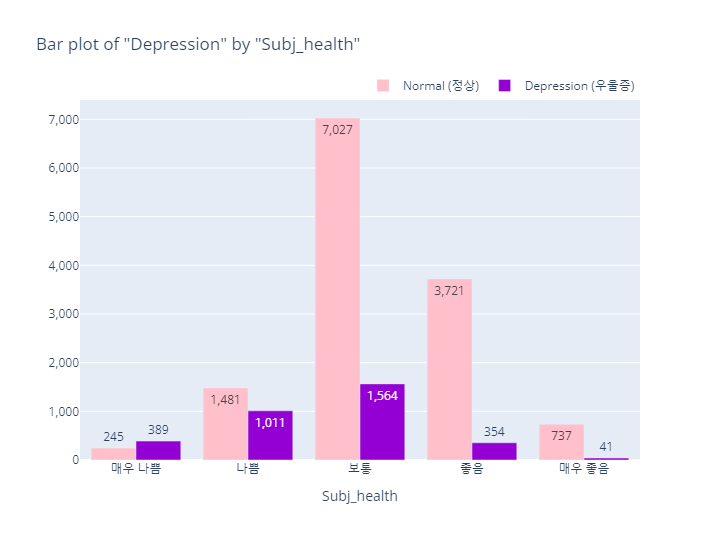

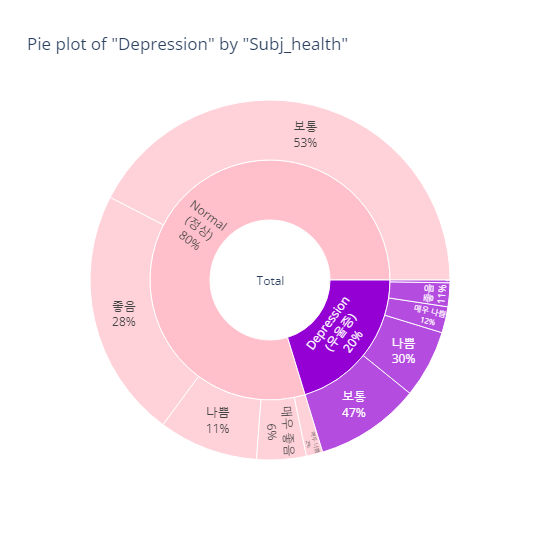

In [45]:
subj_health_order = ['매우 나쁨', '나쁨', '보통', '좋음', '매우 좋음']
bar_category(target='depression', col='subj_health', order_list=subj_health_order)
pie_category(target='depression', col='subj_health')

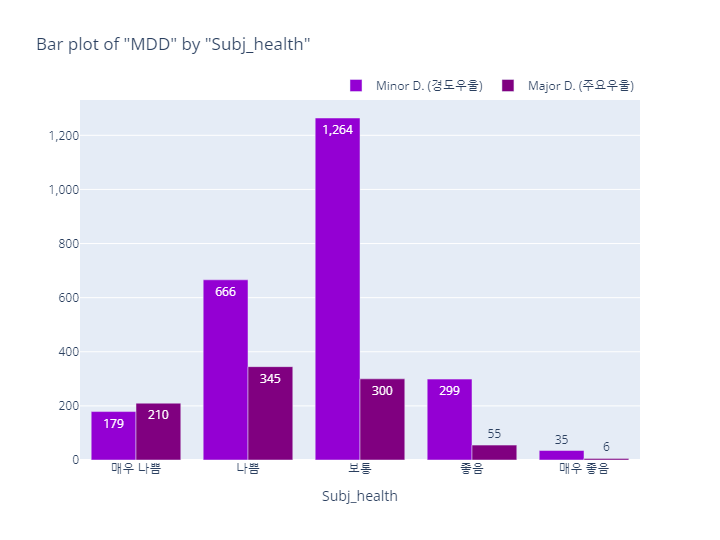

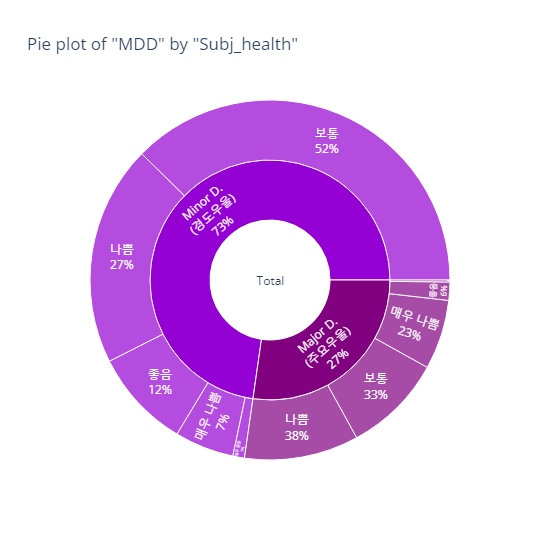

In [46]:
bar_category(target='MDD', col='subj_health', order_list=subj_health_order)
pie_category(target='MDD', col='subj_health')

💡Subjective Health status (주관적 건강 인지도)
- 전반적으로 정규분포와 비슷한 분포를 보이고 있음
- 특징적으로 주관적 건강 인지도가 나쁨 혹은 매우 나쁨인 경우 우울증과 주요우울장애의 비율이 훨씬 높게 나타남
- 보통, 좋음, 매우 좋음인 경우엔 정상군과 경도우울증 비율이 훨씬 높게 나타남
- 따라서 주관적 건강인지도가 나쁠 수록 우울증에 대한 상대적인 위험도는 높아진다고 볼 수 있음

#### 4-5. Stress (스트레스 인지도)

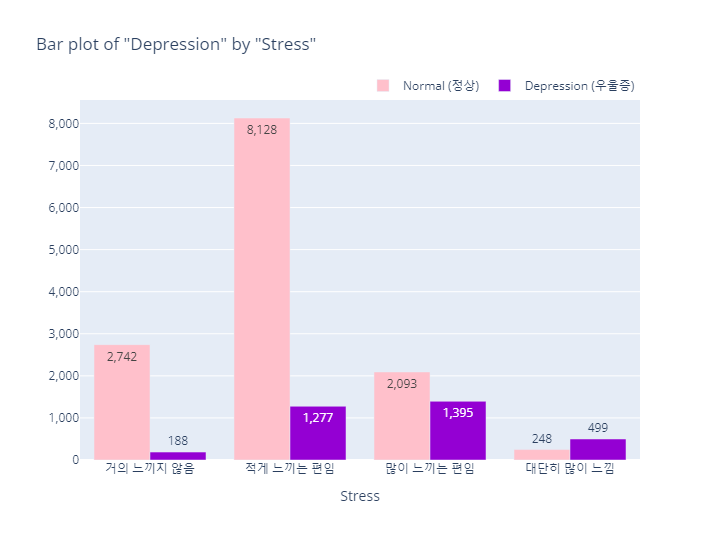

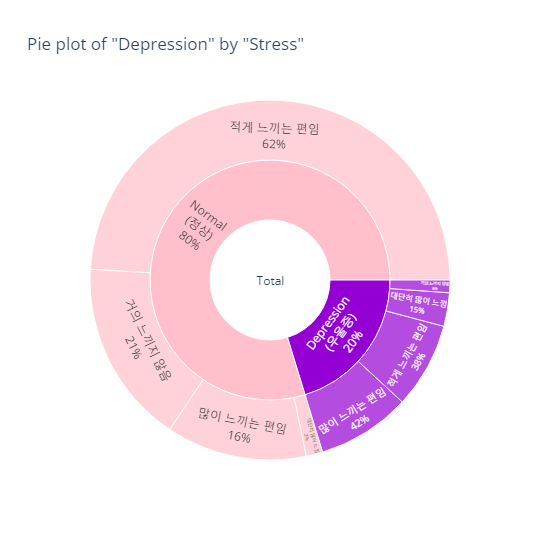

In [47]:
stress_order = ['거의 느끼지 않음', '적게 느끼는 편임', '많이 느끼는 편임', '대단히 많이 느낌']
bar_category(target='depression', col='stress', order_list=stress_order)
pie_category(target='depression', col='stress')

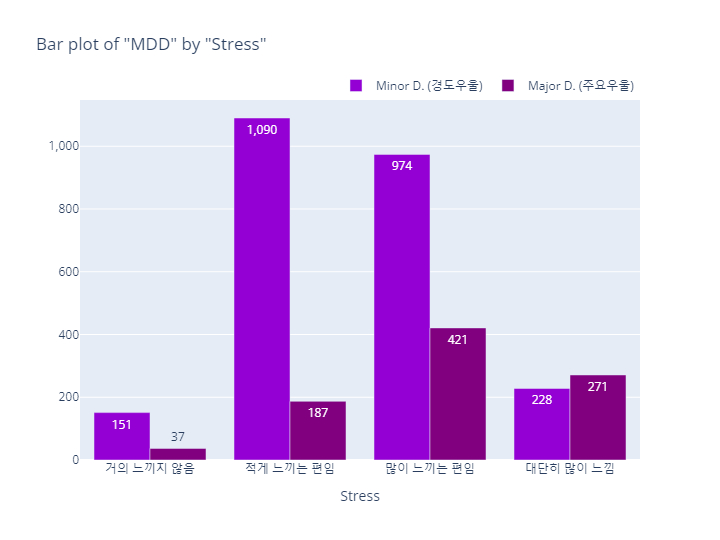

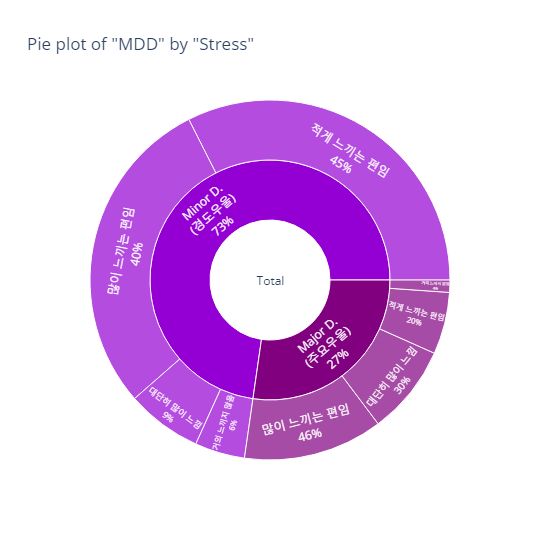

In [48]:
bar_category(target='MDD', col='stress', order_list=stress_order)
pie_category(target='MDD', col='stress')

💡Stress (스트레스 인지도)
- 스트레스를 적게 느끼거나 거의 느끼지 않는 경우엔 정상군 및 경도우울증의 비율이 훨씬 높게 나타남
- 스트레스는 많이 느끼거나 대단히 많이 느끼는 경우엔 우울증 및 주요우울장애의 비율이 훨씬 높게 나타남
- 따라서 스트레스 인지도가 높을 수록 우울증 및 주요우울장애에 대한 위험도는 높아진다고 볼 수 있음.
---

## 5. 📝 EDA 결론 및 모델링 전 체크사항

1. 🔎 데이터 확인
- 결측값 및 중복값 : 없음
- 수치형 독립변수 : 총 2개
- 범주형 독립변수 : 총 16개
- 종속변수 : 각 1개씩 ('depression', 'MDD')
2. 🎯 종속변수 분포
- 우울증 유병률 : 20.3%
- 우울증 유병자 중 주요우울장애(MDD) 유병률 : 27.3%
3. 📈 독립변수 분포 - 수치형
- Age (만나이) : 고르게 분포되어 있음
- BMI (체질량지수) : right skewed 분포, BMI는 50으로 제한하여 모델링 진행 예정
4. 📊 독립변수 분포 - 범주형
- 대시보드에 이용할 변수
    - sex (성별)
    - household (세대 유형)
    - marital (혼인상태)
    - subj_health (주관적 건강 인지도)
    - stress (스트레스 인지도)